In [1]:
#import libraries
import matplotlib
import pandas
import pandas as pd
import os
import json
import csv
from collections import namedtuple
import copy

%matplotlib inline


In [2]:
#function to create bar plots from a dictionary

def plot_dict(d, ylabel="",xlabel=''):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(xlabel,fontsize=16)

In [35]:
#function creates a scatter plot from a dataframe

def scatter(x, y, xlabel="", ylabel=""):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16, xlim=0, ylim=0)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)

In [4]:

def read_json(path):
    f=open(os.path.join("data",path),encoding='utf-8')
    json_str=f.read()
    f.close()
    data=json.loads(json_str)
    return data

def review_check(id_num,path):
    y=''
    f = open(path, encoding="utf-8")
    reader = csv.DictReader(f)
    for row in reader:
        if int(row['review id'])== id_num:
            return row['review text']
    f.close()

def json_paths():
    paths=[]
    for x in sorted(os.listdir('data'),reverse = True):
        if x[-4:]=='json':
            paths.append(os.path.join('data',x))
    return(paths)

def csv_paths():
    paths=[]
    for x in sorted(os.listdir('data'),reverse = True):
        if x[-3:]=='csv':
            paths.append(str(os.path.join('data',x)))
    return(paths)

Review=namedtuple("Review",["id","username","asin","title","text","rating","do_recommend","num_helpful","date"])
    
def get_reviews(csv_name,json_name):
    L=[]
    f=open(os.path.join('data',csv_name),encoding='utf-8')
    reader=csv.DictReader(f)
    for row in reader:
        if(row['review rating']=="True"or row['review rating']=="False"):
            continue
        elif(row['review id']=='3248' or row['review id']=='78245'):
            continue
        if(row['review id']=='78626'):
            L.append(Review(int(row['review id']),
                str(read_json(json_name)[row['review id']][0]),
                str(read_json(json_name)[row['review id']][1]),
                str(row['review title']),
                str(row['review text']),
                int(row['review rating']),
                bool(False),
                int(row['review num_helpful']),
                str(row['review date'])))
        if(row['review id']=='47345'):
            L.append(Review(int(row['review id']),
                str(read_json(json_name)[row['review id']][0]),
                str(read_json(json_name)[row['review id']][1]),
                str(row['review title']),
                str(row['review text']),
                int(row['review rating']),
                bool(False),
                int(row['review num_helpful']),
                str('2016-01-02')))
        else:
            try:
                L.append(Review(int(row['review id']),
                str(read_json(json_name)[row['review id']][0]),
                str(read_json(json_name)[row['review id']][1]),
                str(row['review title']),
                str(row['review text']),
                int(row['review rating']),
                bool(row['review do_recommend']),
                int(row['review num_helpful']),
                str(row['review date'])))
            except:
                continue
    f.close()
    
    return L

all_reviews=[]
x=1
while x<(len(csv_paths())):
    all_reviews.append(get_reviews(('review'+str(x)+'.csv'),('review'+str(x)+'.json')))
    x+=1

def find_review(id_num):
    for i in all_reviews:
        for a in i:
            if a.id== id_num:
                return(a)
            
review_keys=['id','username','asin','title','text','rating','do_recommend','num_helpful','date']

def bucketize(key):
    key_p=0
    for x in range(len(review_keys)):
        if key==review_keys[x]:
            key_p=x
    buckets={}
    for i in (all_reviews):
        for x in i:   
            if x[key_p] not in buckets:
                buckets[x[key_p]]=[]
            buckets[x[key_p]].append(x)
    return buckets

def average_rating(key,bucket):
    total=0
    for i in bucket:
        if key==i:
            for x in range(len(bucket[i])):
                total+=bucket[i][x].rating
            return(total/len(bucket[i]))
        
def get_month(date):
    return(date[5:7])

In [5]:
#q1
sorted(os.listdir('data'), reverse = True)

['sample_reviews.json',
 'sample_reviews.csv',
 'review5.json',
 'review5.csv',
 'review4.json',
 'review4.csv',
 'review3.json',
 'review3.csv',
 'review2.json',
 'review2.csv',
 'review1.json',
 'review1.csv',
 'products.json']

In [6]:
#q2
paths=[]
for x in sorted(os.listdir('data'),reverse = True):
    paths.append(os.path.join('data',x))
paths

['data\\sample_reviews.json',
 'data\\sample_reviews.csv',
 'data\\review5.json',
 'data\\review5.csv',
 'data\\review4.json',
 'data\\review4.csv',
 'data\\review3.json',
 'data\\review3.csv',
 'data\\review2.json',
 'data\\review2.csv',
 'data\\review1.json',
 'data\\review1.csv',
 'data\\products.json']

In [7]:
#q3
json_paths()

['data\\sample_reviews.json',
 'data\\review5.json',
 'data\\review4.json',
 'data\\review3.json',
 'data\\review2.json',
 'data\\review1.json',
 'data\\products.json']

In [8]:
#q4
paths=[]
for x in sorted(os.listdir('data'),reverse = True):
    if x[:6]=='review':
        paths.append(os.path.join('data',x))
paths

['data\\review5.json',
 'data\\review5.csv',
 'data\\review4.json',
 'data\\review4.csv',
 'data\\review3.json',
 'data\\review3.csv',
 'data\\review2.json',
 'data\\review2.csv',
 'data\\review1.json',
 'data\\review1.csv']

In [9]:
#q5
f = open(os.path.join('data','products.json'), "r", encoding="utf-8")
x=f.read()
f.close()
x=json.loads(x)
x

{'B00QFQRELG': 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'B01BH83OOM': 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New',
 'B00ZV9PXP2': 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'B0751RGYJV': 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping',
 'B00IOY8XWQ': 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers',
 'B0752151W6': 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish',
 'B018Y226XO': 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case',
 'B01ACEKAJY': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'B01AHB9CYG': 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'B01AHB9CN2': 'All

In [10]:
#q6
review_check(84440,os.path.join('data','review1.csv'))

'I would recommend this product. It works great and ver compact.'

In [11]:
#q7
y=''
for x in csv_paths():
    if not review_check(28615,x)==None:
        y=review_check(28615,x)
        break
y

'Loveeeeeeeee........................................'

In [12]:
#q8
y=''
for x in csv_paths():
    if not review_check(69273,x)==None:
        y=x
y[5:]

'review2.csv'

In [13]:
#q9
read_json("sample_reviews.json")

{'46663': ['Dmh1589', 'B018Y229OU'],
 '36363': ['Shoot2thril', 'B018Y229OU'],
 '15763': ['Barbara', 'B018Y229OU'],
 '5463': ['Elec8', 'B018Y229OU'],
 '54066': ['Silvrblur', 'B018Y229OU'],
 '33466': ['Trish', 'B018Y229OU'],
 '40869': ['airbear', 'B018Y229OU'],
 '30569': ['lorphe', 'B018Y229OU'],
 '89472': ['felix', 'B018Y229OU'],
 '48272': ['Bull99', 'B018Y229OU']}

In [14]:
#q10
get_reviews('sample_reviews.csv', 'sample_reviews.json')

[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [15]:
#q11
get_reviews('review4.csv', 'review4.json')[:10]

[Review(id=46663, username='Dmh1589', asin='B018Y229OU', title='Nice for kids', text='Easy to use. Memory fills up fast though. Battery life is decent.', rating=4, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=36363, username='Shoot2thril', asin='B018Y229OU', title='Great tablet', text='Great tablet for the price. I already have 3 followers including the hd.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=15763, username='Barbara', asin='B018Y229OU', title='Great tablet', text='Excellent tablet. Love the size. Fits perfectly in my purse. I would recommend this tablet.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=5463, username='Elec8', asin='B018Y229OU', title='Great budget tablet', text='Great tablet for kids. Good for Netflix and YouTube.', rating=5, do_recommend=True, num_helpful=0, date='2016-12-23'),
 Review(id=54066, username='Silvrblur', asin='B018Y229OU', title='Great tablet for the price.', text='I

In [16]:
#q12
get_reviews('review2.csv', 'review2.json')[-10:]


[Review(id=25136, username='Angrydagg', asin='B018Y229OU', title='Nice features for the price.', text='For the price this tables does everything I need. so far.', rating=4, do_recommend=True, num_helpful=0, date='2015-12-30'),
 Review(id=84039, username='Appman2015', asin='B018Y229OU', title='Great for xmas', text='So far I have bought three of these of tablets and they love it', rating=4, do_recommend=True, num_helpful=1, date='2015-12-30'),
 Review(id=22239, username='SuzieQ', asin='B018Y229OU', title='great for pre teens', text='i am glad i got them for my grand children they r enjoying them', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=70842, username='Gracie', asin='B018Y229OU', title='Great kindle', text='Purchase was good. Very easy to set up and use. Clear screen. Easy to charge. Would like more storage.', rating=5, do_recommend=True, num_helpful=0, date='2015-12-31'),
 Review(id=60542, username='Jeremyjeepster', asin='B018Y229OU', title='Good ent

In [17]:
#q13
find_review(25401)   

Review(id=25401, username='Brody16', asin='B018Y229OU', title='Wonderful for our grandsons', text='Love the ease of using them for our grandsons and they enjoyed them for Christmas', rating=1, do_recommend=True, num_helpful=0, date='2017-01-06')

In [18]:
#q14
find_review(78626)

Review(id=78626, username='Mijenx', asin='B01AHB9CN2', title='Ended up returning', text='I bought this tablet for my 4 year old daughter. Too many advertisements. I would rather pay more and not have a single ad.', rating=1, do_recommend=False, num_helpful=2, date='2016-11-25')

In [19]:
#q15
def username(a):
    return(a.username)

sorted([a for i in all_reviews for a in i],key=username,reverse=True)[:10]

[Review(id=29325, username='zerofighterblue', asin='B018Y229OU', title='cant live without', text='have a kindle with a broken screen. bought originally for 99.00. now regular price is 49.99 and were on sale black Friday for 34.99. got 2 more.', rating=5, do_recommend=True, num_helpful=1, date='2015-12-10'),
 Review(id=96947, username='zedog83', asin='B01AHB9CN2', title='Great for kids', text='Bought this for our 6 year old daughter and she uses it daily. She enjoys watching movies on it and playing learning games. So far it has been very durable and battery life has been great.', rating=5, do_recommend=True, num_helpful=0, date='2017-01-18'),
 Review(id=77499, username='zcraig7', asin='B018Y229OU', title='Awesome picture quality', text='I bought two of these for black friday and the kids love them', rating=5, do_recommend=True, num_helpful=0, date='2016-01-04'),
 Review(id=48890, username='zarm7', asin='B018Y229OU', title='This is a nice tablet', text='I bought it for reading books. An

In [20]:
#q16
import operator
users=copy.deepcopy(bucketize('username'))
for x in (users):
    users[x]=len(bucketize('username')[x])

dict(sorted(users.items(),key=operator.itemgetter(1),reverse=True)[:22])

{'1234': 4,
 'Missy': 4,
 'Dave': 4,
 'Mike': 4,
 'Susan': 4,
 'Frank': 3,
 'paul': 3,
 'Lisa': 3,
 'Susie': 3,
 'Steve': 3,
 'Grandma': 3,
 'Bubba': 3,
 'Richard': 3,
 'Angie': 3,
 'Chris': 3,
 'Manny': 3,
 'Michael': 3,
 'John': 3,
 'steve': 3,
 'James': 3,
 'Bill': 3,
 'Kathy': 3}

In [21]:
#q17
d={}
L=bucketize('username')
for i in L:
    d[i]=0
    for x in range(len(L[i])):
        d[i]=d[i]+L[i][x].num_helpful

five_helpful={}
for i in d:
    if d[i]>=5:
        five_helpful[i]=d[i]
five_helpful


{'Stuartc': 8,
 'Earthdog': 27,
 'Ellen': 10,
 'Rodge': 6,
 'Karch': 5,
 'FrankW': 5,
 'Kime': 5,
 'Mark': 5,
 '1Briansapp': 5,
 'trouble': 5,
 'Raza': 5}

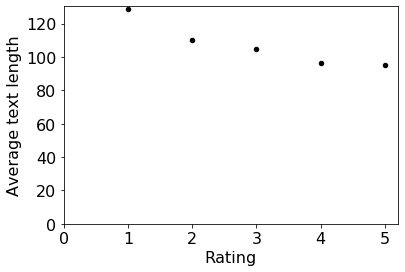

In [22]:
#q18
L_one=[]
L_two=[]

R=bucketize('rating')
for i in R:
    L_one.append(i)
    average=0
    for x in range(len(R[i])):
        average+=len(R[i][x].text)
    L_two.append(average/len(R[i]))   

scatter(L_one,L_two,xlabel='Rating',ylabel='Average text length')

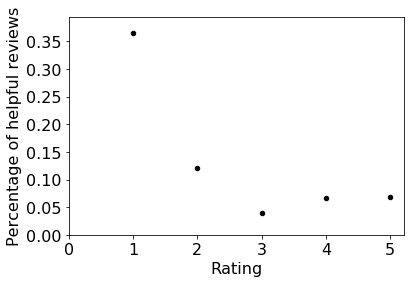

In [23]:
#q19
L_one=[]
L_two=[]

R=bucketize('rating')
for i in R:
    L_one.append(i)
    helpful=0
    for x in range(len(R[i])):
        if R[i][x].num_helpful>0:
            helpful+=1
        
    L_two.append(helpful/len(R[i]))   

scatter(L_one,L_two,xlabel='Rating',ylabel='Percentage of helpful reviews')

In [24]:
#q20
f = open(os.path.join('data','products.json'), "r", encoding="utf-8")
x=f.read()
f.close()
x=json.loads(x)
L=bucketize('asin')
arep={}
for i in x:
    arep[x[i]]=average_rating(i,L)
arep

{'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders': 4.7272727272727275,
 'Amazon Tap Smart Assistant Alexa enabled (black) Brand New': 4.6909090909090905,
 'All-New Kindle E-reader - Black, 6" Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers': 4.590163934426229,
 'Amazon Echo (2nd Generation) Smart Assistant Oak Finish Priority Shipping': 5.0,
 'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers': 4.666666666666667,
 'All-new Echo (2nd Generation) with improved sound, powered by Dolby, and a new design Walnut Finish': 5.0,
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case': 4.603448275862069,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black': 4.583333333333333,
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta': 4.574468085106383,


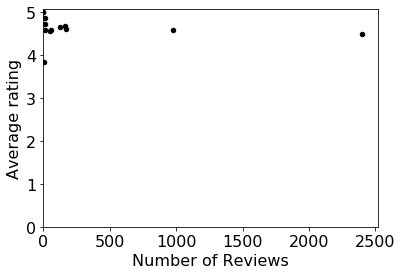

In [25]:
#q21
f = open(os.path.join('data','products.json'), "r", encoding="utf-8")
x=f.read()
f.close()
x=json.loads(x)
L=bucketize('asin')
arep={}
for i in x:
    arep[i]=average_rating(i,L)
L_one=[]
L_two=[]
for i in L:
    L_one.append(len(L[i]))
for i in arep:
    L_two.append(arep[i])
scatter(L_one,L_two,xlabel='Number of Reviews',ylabel='Average rating')

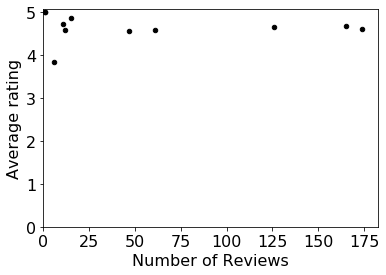

In [26]:
#q22
L_one_copy=copy.deepcopy(L_one)
i=0
while i < len(L_one_copy):
    
    if L_one_copy[i]>500:
        L_one_copy.pop(i)
        L_two.pop(i)
    else:
        i+=1
scatter(L_one_copy,L_two,xlabel='Number of Reviews',ylabel='Average rating')

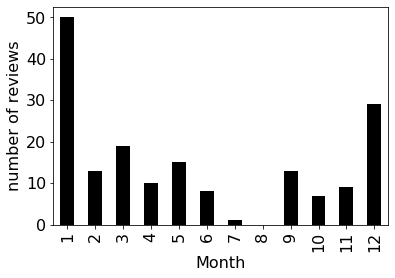

In [27]:
#q23
f = open(os.path.join('data','products.json'), "r", encoding="utf-8")
x=f.read()
f.close()
x=json.loads(x)
L=bucketize('asin')
asin=''
for i in x:
    if x[i]==  'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case':
        asin=i
product=L[asin]
D={}
a=1
while a <(13):
    D[a]=0
    a+=1
for i in product:
    D[int(get_month(i.date))]=D[int(get_month(i.date))]+1
plot_dict(D,"number of reviews",'Month')




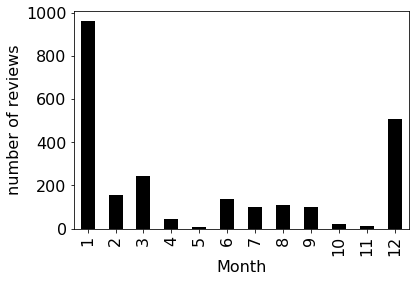

In [28]:
#q24
f = open(os.path.join('data','products.json'), "r", encoding="utf-8")
x=f.read()
f.close()
x=json.loads(x)
L=bucketize('asin')
asin=''
for i in x:
    if x[i]=='Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta'  :
        asin=i
product=L[asin]
D={}
a=1
while a <(13):
    D[a]=0
    a+=1
for i in product:
    try:
        D[int(get_month(i.date))]=D[int(get_month(i.date))]+1
    except:
        continue
plot_dict(D,"number of reviews","Month")


In [29]:
def recursive(d):
    for k in os.listdir(d):
        path = os.path.join(d,k)
        if os.path.isdir(path)==True:
            recursive(path)
        elif os.path.isfile(path)==True:
            (L.append(path))
    return(sorted(L,reverse=True))

In [30]:
#q25
L=[]
L=(recursive('broken_file'))
paths=[]
for i in L:
    if "very_helpful" in i:
        paths.append(i)
paths

['broken_file\\rating4\\very_helpful\\very_helpful.json']

In [31]:
#q26
L=[]
L=(recursive('broken_file'))
paths=[]
for i in L:
    if "rating5" in i:
        paths.append(i)
paths

['broken_file\\rating5\\others.json',
 'broken_file\\rating5\\helpful\\helpful.json']

In [32]:
#q27
L=[]
L=recursive('broken_file')
L

['broken_file\\rating5\\others.json',
 'broken_file\\rating5\\helpful\\helpful.json',
 'broken_file\\rating4\\very_helpful\\very_helpful.json',
 'broken_file\\rating4\\others\\short\\short.json',
 'broken_file\\rating4\\others\\others\\others.json',
 'broken_file\\rating4\\not_helpful.json',
 'broken_file\\rating3\\others\\others.json',
 'broken_file\\rating3\\long\\long.json',
 'broken_file\\others.json']

In [33]:
#q28
def read(path):
    f=open(path,encoding='utf-8')
    json_str=f.read()
    f.close()
    data=json.loads(json_str)
    return data
L=[]
L=recursive('broken_file')

BF={}
unique_asins=[]
num_unique_asins=0
for i in L:
    BF[i]=read(i)
for i in BF:
    for x in BF[i]:
        if (BF[i][x][1]) not in unique_asins:
            unique_asins.append(BF[i][x][1])
            num_unique_asins+=1;
num_unique_asins


1

In [34]:
#q29
L=[]
L=recursive('broken_file')

total_1=-1    #for header
total_2=0
for i in all_reviews:
    for x in i:
        total_1+=1
for file in L:
    reviews=read(file)
    total_2+=len(reviews)
total_1+total_2


4995